In [1]:
from pathlib import Path
import scipy
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
import scipy.stats as stats
from scipy.interpolate import InterpolatedUnivariateSpline, BSpline, CubicSpline, make_lsq_spline, make_interp_spline

In [2]:
file = "../data/SSCURVES(1-61).xlsx"

 95%|████████████████████████████████████████████████████████████   | 60/63 [00:04<00:00, 13.47it/s]


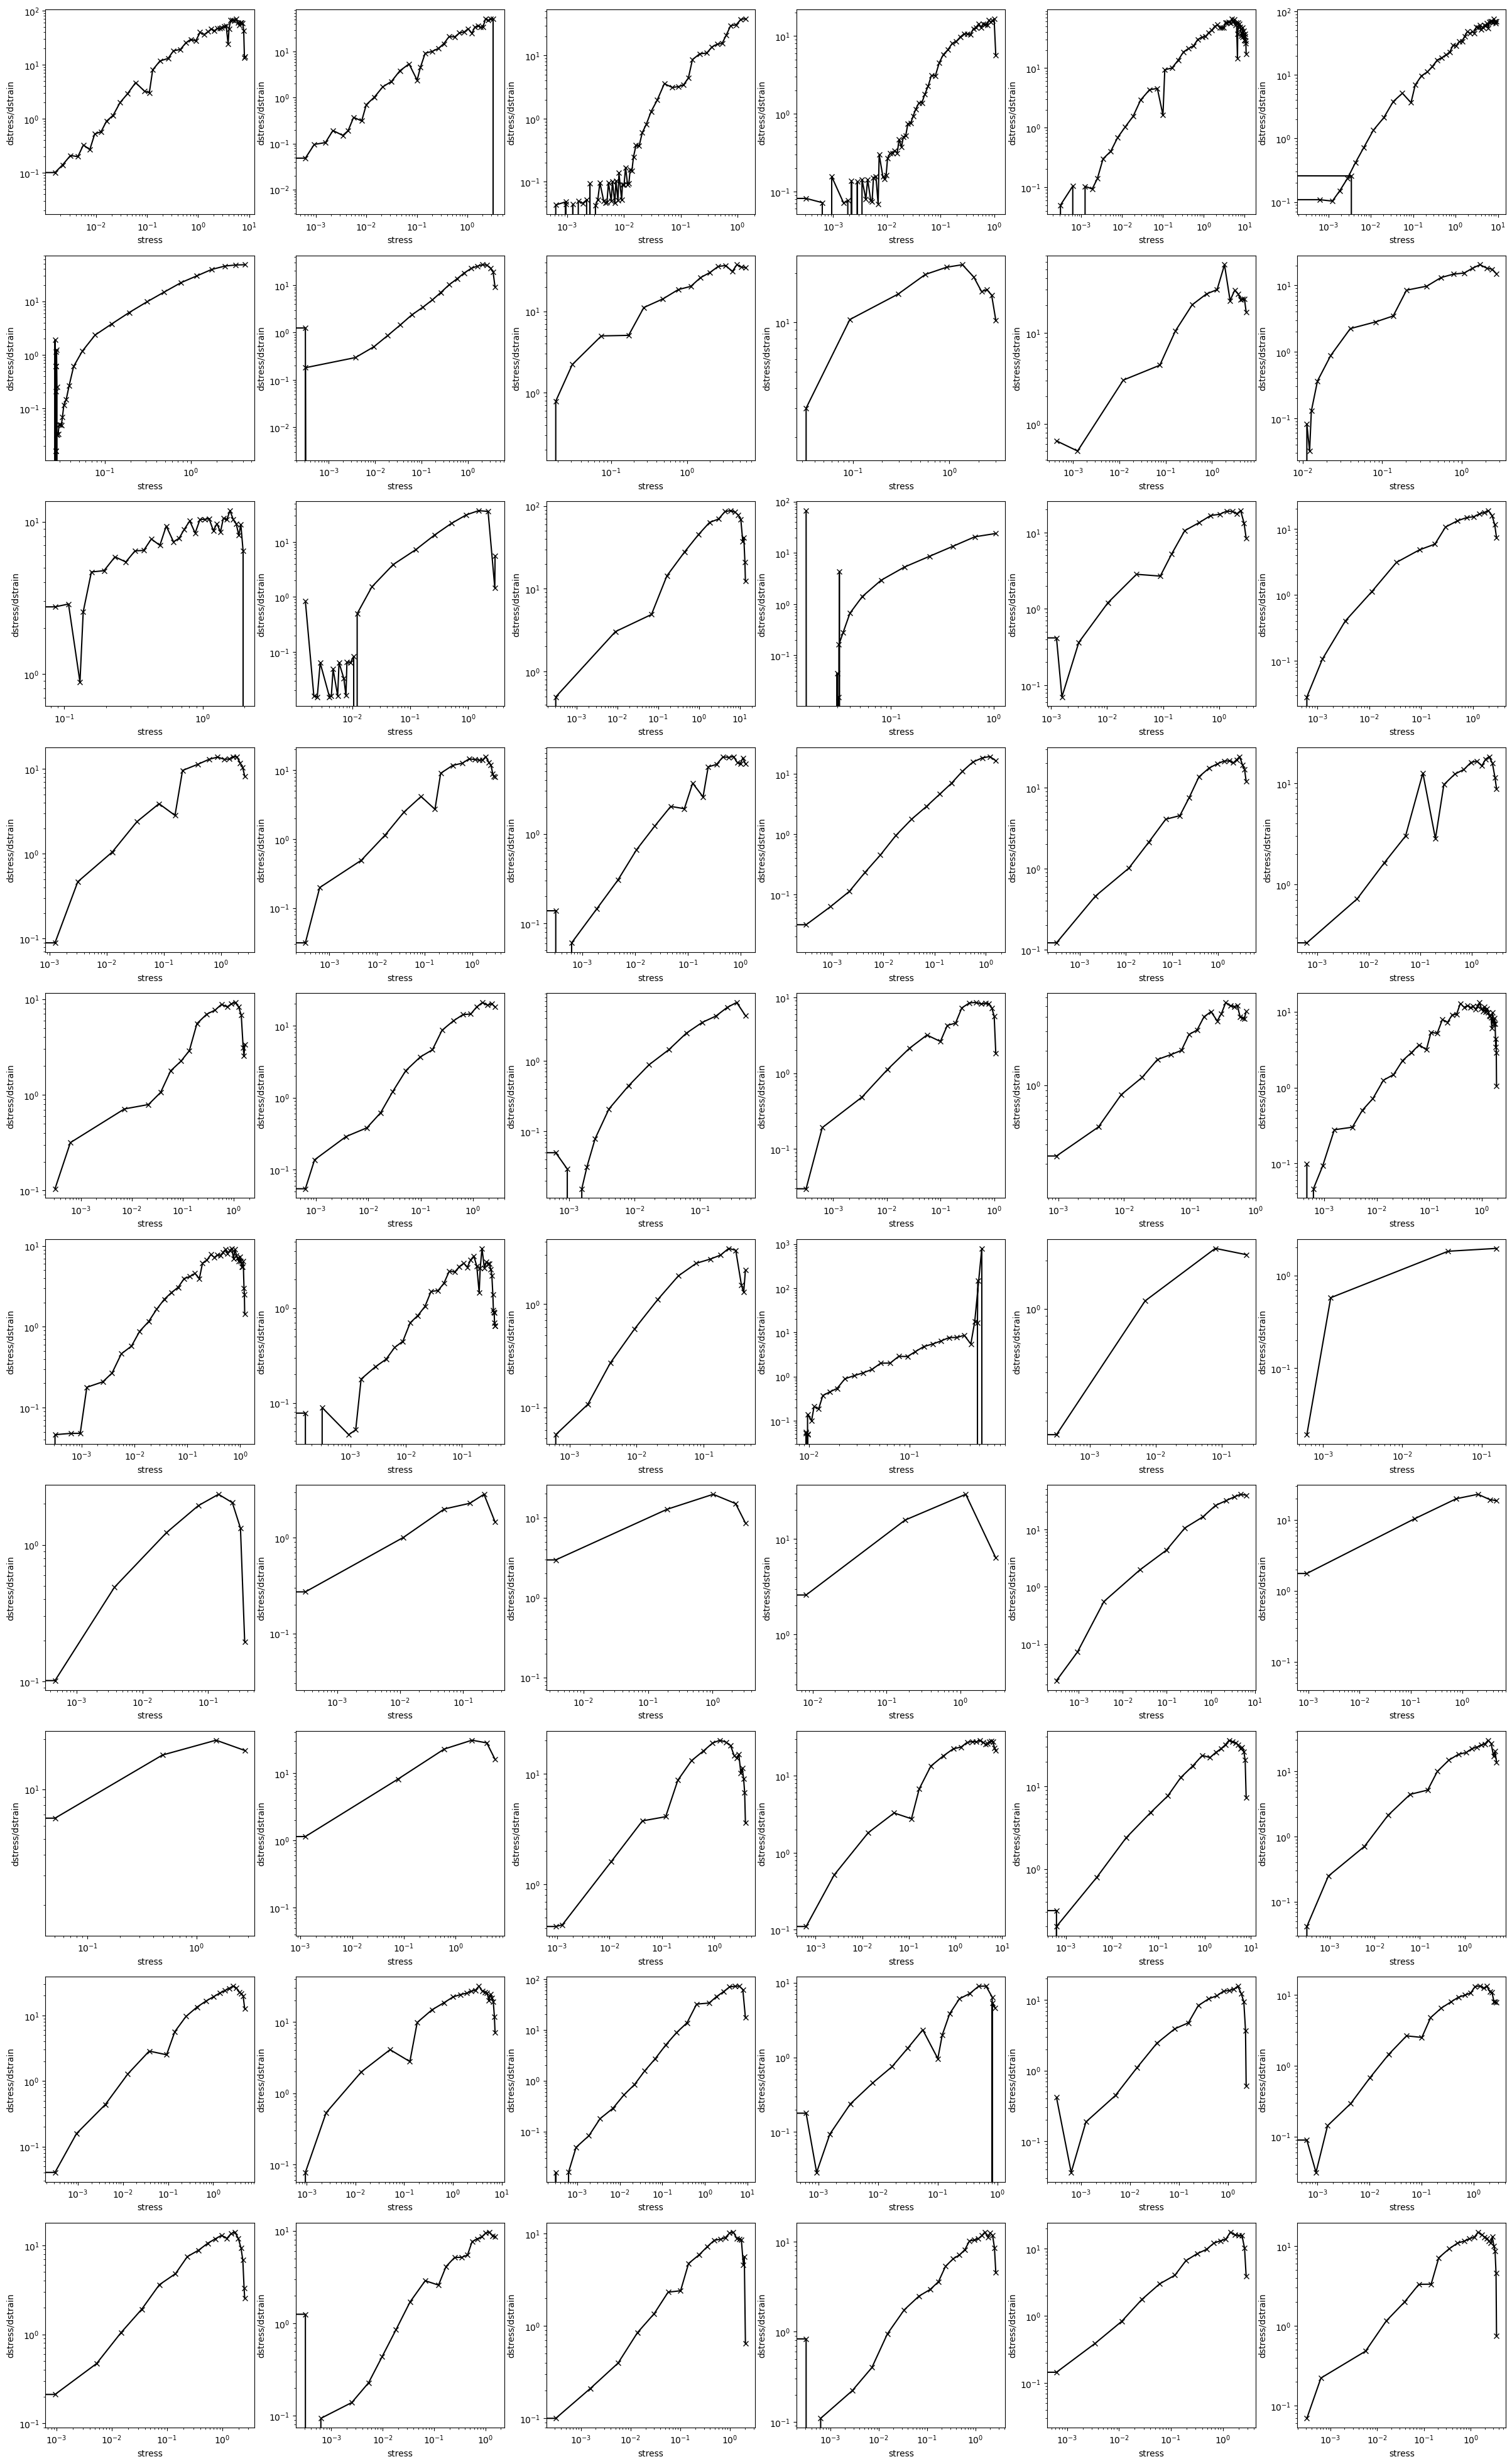

In [4]:
xls = pd.ExcelFile(file)

fig, axs = plt.subplots(10, 6, figsize=(30,50))


for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=len(xls.sheet_names), ncols=100):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.groupby('Strain', as_index=False).agg('mean', numeric_only=True)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']

    dydx = np.diff(df['Stress']) / np.diff(df['Strain'])

    ax.loglog(y_data[:-1], dydx, marker='x', color='black')
    ax.set_xlabel('stress')
    ax.set_ylabel('dstress/dstrain')
plt.show()
